In [100]:
import sys
import os

# Get the current directory of the notebook
notebook_dir = os.path.abspath('')
_dir = os.path.dirname(notebook_dir)
_dir = os.path.dirname(_dir)
_dir = os.path.dirname(_dir)
sys.path.append(_dir)

<hr />

In [101]:
from util import excel_table, graph, graph_fit
from util.structs import DataCluster, Dataset, Measurement

In [102]:
l = 100
R_max = Measurement(5.3, 0.06);
Ampere_max_skt = 50
Ampere_max = 500 * 1e-3 # A
Volt_max_skt = 50
Volt_max = 5 # V

def get_value_from_skt(skt, skt_max, value_max):
    return value_max * (skt/skt_max)

In [103]:
table = excel_table.read("./data/232f")
print(table[:2])
table_data = table[2:]

[[None 'R_L= ∞Ω' 'R_L = 20Ω' 'R_L = 50Ω']
 ['x [skt]' 'U_L [skt]' 'U_L [skt]' 'U_L [skt]']]


In [104]:
data = DataCluster()

for row in table_data:
    dset = Dataset({
        "x [skt]": l - Measurement(row[0], 1),
        "R_inf U [skt]": Measurement(row[1], 1),
        "R_20 U [skt]": Measurement(row[2], 1),
        "R_50 U [skt]": Measurement(row[3], 1),
    })
    data.add(dset);
    
data.print_2();

R_20 U [skt]  | R_50 U [skt]  | R_inf U [skt] | x [skt]      
--------------+---------------+---------------+--------------
( 37.0 ± 1.0) | ( 37.0 ± 1.0) | ( 38.0 ± 1.0) | ( 95.0 ± 1.0)
( 32.0 ± 1.0) | ( 33.0 ± 1.0) | ( 34.0 ± 1.0) | ( 85.0 ± 1.0)
( 28.0 ± 1.0) | ( 29.0 ± 1.0) | ( 30.0 ± 1.0) | ( 75.0 ± 1.0)
( 23.0 ± 1.0) | ( 25.0 ± 1.0) | ( 26.0 ± 1.0) | ( 65.0 ± 1.0)
( 20.0 ± 1.0) | ( 21.0 ± 1.0) | ( 22.0 ± 1.0) | ( 55.0 ± 1.0)
( 16.0 ± 1.0) | ( 17.0 ± 1.0) | ( 18.0 ± 1.0) | ( 45.0 ± 1.0)
( 13.0 ± 1.0) | ( 14.0 ± 1.0) | ( 14.0 ± 1.0) | ( 35.0 ± 1.0)



In [105]:
def get_value_from_skt(skt, skt_max, value_max):
    return value_max * (skt/skt_max)

In [106]:
for d in data:
    d["R"] = R_max * d["x [skt]"] / l;
    d["R_50 U [V]"] = get_value_from_skt(d["R_50 U [skt]"], Volt_max_skt, Volt_max)
    d["R_20 U [V]"] = get_value_from_skt(d["R_20 U [skt]"], Volt_max_skt, Volt_max)
    d["R_inf U [V]"] = get_value_from_skt(d["R_inf U [skt]"], Volt_max_skt, Volt_max)

data = data.copy_remove_index("R_50 U [skt]");
data = data.copy_remove_index("R_20 U [skt]");
data = data.copy_remove_index("R_inf U [skt]");
data.print_2()
data.save_to_excel("./output/232f")

R                | R_20 U [V]       | R_50 U [V]       | R_inf U [V]      | x [skt]      
-----------------+------------------+------------------+------------------+--------------
(503.5 ± 7.8)e-2 | ( 37.0 ± 1.0)e-1 | ( 37.0 ± 1.0)e-1 | ( 38.0 ± 1.0)e-1 | ( 95.0 ± 1.0)
(450.5 ± 7.4)e-2 | ( 32.0 ± 1.0)e-1 | ( 33.0 ± 1.0)e-1 | ( 34.0 ± 1.0)e-1 | ( 85.0 ± 1.0)
(397.5 ± 7.0)e-2 | ( 28.0 ± 1.0)e-1 | ( 29.0 ± 1.0)e-1 | ( 30.0 ± 1.0)e-1 | ( 75.0 ± 1.0)
(344.5 ± 6.6)e-2 | ( 23.0 ± 1.0)e-1 | ( 25.0 ± 1.0)e-1 | ( 26.0 ± 1.0)e-1 | ( 65.0 ± 1.0)
(291.5 ± 6.2)e-2 | ( 20.0 ± 1.0)e-1 | ( 21.0 ± 1.0)e-1 | ( 22.0 ± 1.0)e-1 | ( 55.0 ± 1.0)
(238.5 ± 5.9)e-2 | ( 16.0 ± 1.0)e-1 | ( 17.0 ± 1.0)e-1 | ( 18.0 ± 1.0)e-1 | ( 45.0 ± 1.0)
(185.5 ± 5.7)e-2 | ( 13.0 ± 1.0)e-1 | ( 14.0 ± 1.0)e-1 | ( 14.0 ± 1.0)e-1 | ( 35.0 ± 1.0)



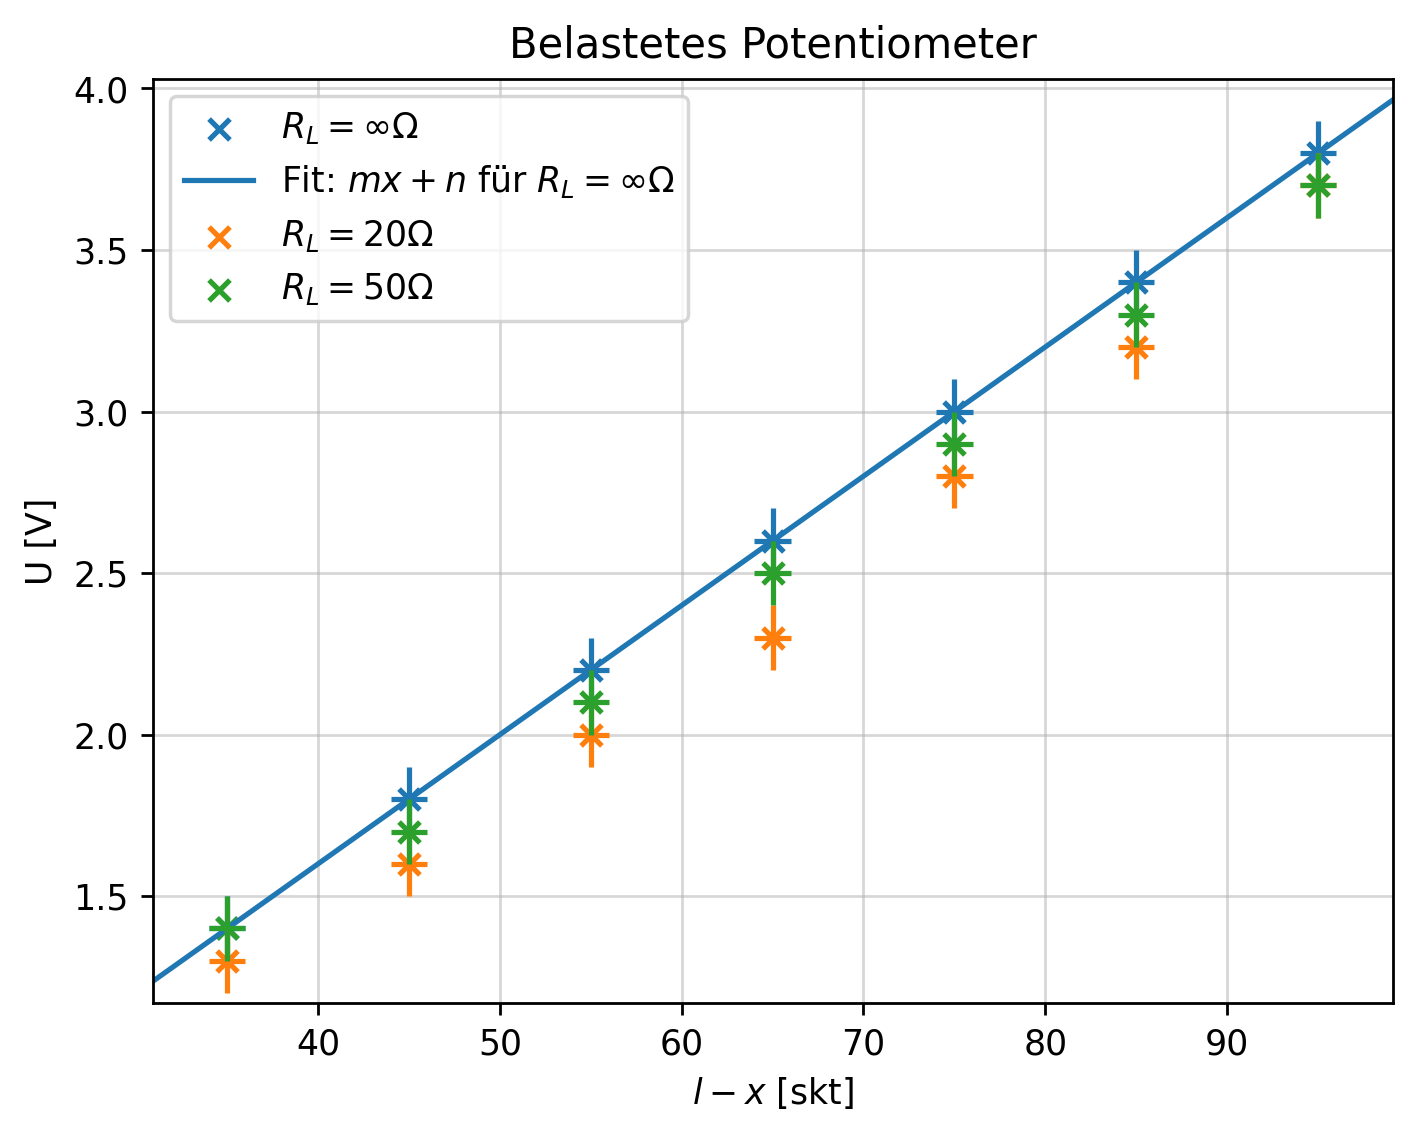

In [107]:
plot = graph.create_plot();    
fig, ax = plot

ax.grid(alpha=.5)
ax.set_xlabel(r"$l - x$ [skt]")
ax.set_ylabel(r"U [V]")
ax.set_title("Belastetes Potentiometer")

graph.scatter_data(data, "x [skt]", "R_inf U [V]", plot=plot, marker="x", label=r"$R_L = \infty\Omega$")
func, params = graph_fit.Linear.on_data(data, "x [skt]", "R_inf U [V]")
graph.plot_func(func, plot, False, label=r"Fit: $mx + n$ für $R_L = \infty\Omega$");
graph.scatter_data(data, "x [skt]", "R_20 U [V]", plot=plot, marker="x", label=r"$R_L = 20\Omega$")
graph.scatter_data(data, "x [skt]", "R_50 U [V]", plot=plot, marker="x", label=r"$R_L = 50\Omega$")

fig.set_dpi(250)
ax.legend()

fig.savefig("./output/plot_232f")
fig.savefig("./pdf/plot_232f.pdf")

In [108]:
U_0 = Measurement(4, 0.2);

for d in data:
    d["x/l*U_0"] = (d["x [skt]"] / l * U_0).round_digit(1);

data = data.copy_remove_index("R")
data.print_2();

data.save_to_excel_measurements("./output/232f")

R_20 U [V]       | R_50 U [V]       | R_inf U [V]      | x [skt]       | x/l*U_0         
-----------------+------------------+------------------+---------------+-----------------
( 37.0 ± 1.0)e-1 | ( 37.0 ± 1.0)e-1 | ( 38.0 ± 1.0)e-1 | ( 95.0 ± 1.0) | ( 38.0 ± 2.0)e-1
( 32.0 ± 1.0)e-1 | ( 33.0 ± 1.0)e-1 | ( 34.0 ± 1.0)e-1 | ( 85.0 ± 1.0) | ( 34.0 ± 2.0)e-1
( 28.0 ± 1.0)e-1 | ( 29.0 ± 1.0)e-1 | ( 30.0 ± 1.0)e-1 | ( 75.0 ± 1.0) | ( 30.0 ± 2.0)e-1
( 23.0 ± 1.0)e-1 | ( 25.0 ± 1.0)e-1 | ( 26.0 ± 1.0)e-1 | ( 65.0 ± 1.0) | ( 26.0 ± 2.0)e-1
( 20.0 ± 1.0)e-1 | ( 21.0 ± 1.0)e-1 | ( 22.0 ± 1.0)e-1 | ( 55.0 ± 1.0) | ( 22.0 ± 2.0)e-1
( 16.0 ± 1.0)e-1 | ( 17.0 ± 1.0)e-1 | ( 18.0 ± 1.0)e-1 | ( 45.0 ± 1.0) | ( 18.0 ± 1.0)e-1
( 13.0 ± 1.0)e-1 | ( 14.0 ± 1.0)e-1 | ( 14.0 ± 1.0)e-1 | ( 35.0 ± 1.0) | ( 14.0 ± 1.0)e-1

